In [ ]:
# Install necessary libraries
!pip install osmnx geopandas pandas matplotlib folium seaborn
!pip install wget
!pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4
    Uninstalling networkx-3.4:
      Successfully uninstalled networkx-3.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4ff1bd972be2e3bcff0ea5a3acb738c3144d4294f28bcb63e7471d2da1f3dd22
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c76

#***Importing Libraries***

In [ ]:
# Import required libraries
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#***Use OpenStreetMap to identify multilane arterial roads in Iowa***

/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


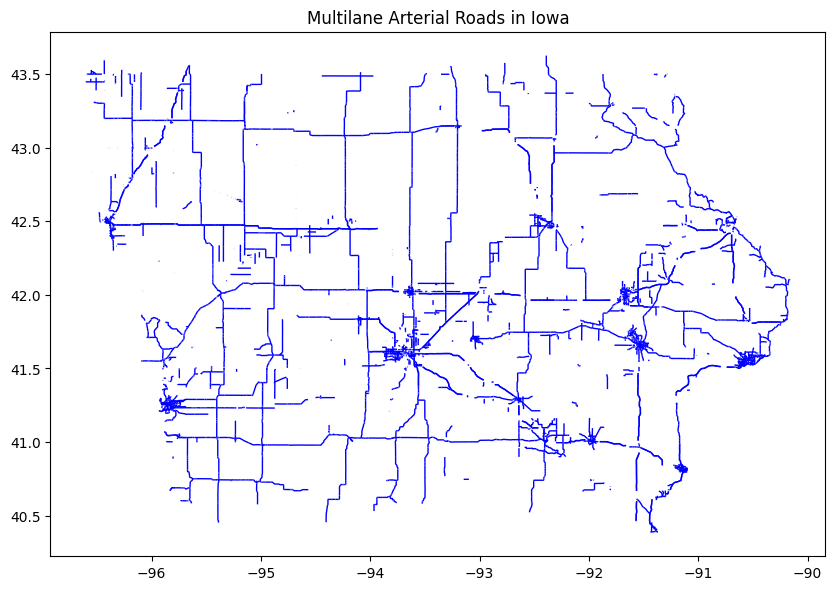

In [ ]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Identify multilane arterial roads in Iowa
place_name = "Iowa, USA"

# Tags to filter arterial roads based on their classification in OpenStreetMap
tags = {'highway': ['primary', 'secondary', 'tertiary', 'trunk']}

# Use the updated function 'features_from_place'
roads = ox.features_from_place(place_name, tags)

# Check if the 'lanes' column exists and filter multilane roads
if 'lanes' in roads.columns:
    # Convert 'lanes' to numeric, errors='coerce' will turn non-numeric values into NaN
    roads['lanes'] = pd.to_numeric(roads['lanes'], errors='coerce')
    multilane_roads = roads[roads['lanes'] >= 2]
else:
    print("No 'lanes' data available, using all roads as a fallback")
    multilane_roads = roads

# Display the first few rows to verify the data
multilane_roads.head()

# Alternative option: Using geopandas and matplotlib for static plots
multilane_roads.plot(figsize=(10, 10), color="blue", linewidth=1)
plt.title("Multilane Arterial Roads in Iowa")
plt.show()



#***Data Extraction and Merging***

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Set the base directory path where your folders are stored
base_path = '/content/drive/My Drive/miniprojectdata/'

# Initialize an empty list to store DataFrames for each year
all_years_data = []

for year_folder in os.listdir(base_path):
    year_path = os.path.join(base_path, year_folder)
    if os.path.isdir(year_path):  # Check if it's a directory

        # Read ACC_AUX.csv and filter
        acc_aux_path = os.path.join(year_path, 'ACC_AUX.CSV')
        acc_aux_df = pd.read_csv(acc_aux_path)
        filtered_acc_aux = acc_aux_df[(acc_aux_df['STATE'] == 19) & (acc_aux_df['FATALS'] > 0) & (acc_aux_df['A_ROADFC'] < 4)]

        # Read accident.csv
        accident_path = os.path.join(year_path, 'accident.csv')
        accident_df = pd.read_csv(accident_path, encoding='ISO-8859-1')

        # Merge the two DataFrames based on ST_CASE
        merged_df = pd.merge(accident_df, filtered_acc_aux, on='ST_CASE', how='inner')

        # Append the merged DataFrame to the list
        all_years_data.append(merged_df)

# Concatenate all DataFrames into one final DataFrame
final_df = pd.concat(all_years_data, ignore_index=True)

# Define the file path where you want to save the CSV in Google Drive
file_path = '/content/drive/My Drive/miniprojectdata/final_df.csv'

# Save the final DataFrame as a CSV file
final_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

<ipython-input-9-fd3cb515aba7>:21: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_df = pd.read_csv(accident_path, encoding='ISO-8859-1')


DataFrame saved to /content/drive/My Drive/miniprojectdata/final_df.csv


In [ ]:
# Load the FARS pedestrian fatality dataset
fars_data = pd.read_csv('/content/drive/MyDrive/miniprojectdata/final_df.csv')




In [ ]:
fars_data.head()

,STATE_x,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,A_HR,A_DIST,A_DROWSY,BIA,SPJ_INDIAN,INDIAN_RES,COUNTY,A_WRONGWAY,CENSUS_2020_TRACT_FIPS,TRACT
0,19,Iowa,190002,1,1,0,0,1,1,0,...,2,2,2,0,0,0,NaN,NaN,NaN,NaN
1,19,Iowa,190004,1,1,0,0,5,5,0,...,2,2,2,0,0,0,NaN,NaN,NaN,NaN
2,19,Iowa,190008,1,1,0,0,1,1,0,...,2,2,2,0,0,0,NaN,NaN,NaN,NaN
3,19,Iowa,190010,2,2,0,0,3,3,0,...,2,2,2,0,0,0,NaN,NaN,NaN,NaN
4,19,Iowa,190014,2,2,0,0,2,2,0,...,2,2,2,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
fars_data.describe()

,STATE_x,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY_x,...,A_HR,A_DIST,A_DROWSY,BIA,SPJ_INDIAN,INDIAN_RES,COUNTY,A_WRONGWAY,CENSUS_2020_TRACT_FIPS,TRACT
count,639.0,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,379.000000,...,639.000000,639.000000,639.00000,639.0,639.0,639.0,260.000000,260.000000,2.600000e+02,260.0
mean,19.0,190156.039124,1.776213,1.751174,0.025039,0.101721,2.422535,2.41784,0.106416,110.873351,...,1.978091,1.937402,1.99061,0.0,0.0,0.0,112.946154,1.965385,1.911321e+10,1.0
std,0.0,94.162918,0.970569,0.954643,0.166088,0.317682,1.619781,1.61955,0.328299,55.582198,...,0.146502,0.242428,0.09652,0.0,0.0,0.0,54.170446,0.183156,5.409613e+07,0.0
min,19.0,190001.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,...,1.000000,1.000000,1.00000,0.0,0.0,0.0,1.000000,1.000000,1.900196e+10,1.0
25%,19.0,190072.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,63.000000,...,2.000000,2.000000,2.00000,0.0,0.0,0.0,62.500000,2.000000,1.906256e+10,1.0
50%,19.0,190156.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.00000,0.000000,117.000000,...,2.000000,2.000000,2.00000,0.0,0.0,0.0,127.000000,2.000000,1.912795e+10,1.0
75%,19.0,190242.500000,2.000000,2.000000,0.000000,0.000000,3.000000,3.00000,0.000000,155.000000,...,2.000000,2.000000,2.00000,0.0,0.0,0.0,153.000000,2.000000,1.915301e+10,1.0
max,19.0,190329.000000,12.000000,11.000000,2.000000,2.000000,16.000000,16.00000,2.000000,197.000000,...,2.000000,2.000000,2.00000,0.0,0.0,0.0,195.000000,2.000000,1.919569e+10,1.0


In [ ]:
# Install contextily
!pip install contextily --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 42.0 MB/s eta 0:00:00


<ipython-input-12-b7d2ed638121>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


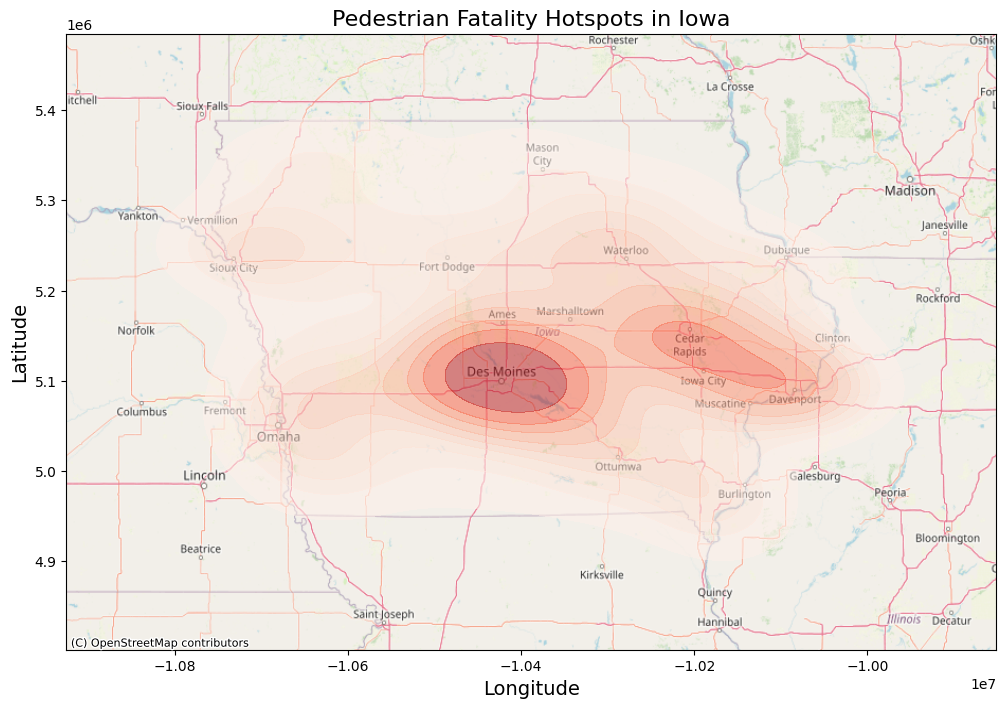

In [ ]:
# Import necessary libraries for Step 3
from shapely.geometry import Point
from sklearn.neighbors import KernelDensity
import contextily as ctx

# Step 3: Perform Spatial Analysis (Hotspot Detection)

# 1. Create a GeoDataFrame from pedestrian fatality data using latitude and longitude
geometry = [Point(xy) for xy in zip(fars_data['LONGITUD'], fars_data['LATITUDE'])]
geo_df = gpd.GeoDataFrame(fars_data, crs="EPSG:4326", geometry=geometry)

# 2. Perform Kernel Density Estimation (KDE) for hotspot detection
coords = np.vstack([geo_df.geometry.x, geo_df.geometry.y]).T
kde = KernelDensity(bandwidth=0.05).fit(coords)

# 3. Create a grid for KDE
x_d = np.linspace(geo_df.geometry.x.min(), geo_df.geometry.x.max(), 100)
y_d = np.linspace(geo_df.geometry.y.min(), geo_df.geometry.y.max(), 100)
xv, yv = np.meshgrid(x_d, y_d)
grid = np.vstack([xv.ravel(), yv.ravel()]).T

# 4. Calculate the KDE values
kde_values = kde.score_samples(grid)

# 5. Convert the GeoDataFrame to Web Mercator for compatibility with map tiles
geo_df_web_mercator = geo_df.to_crs(epsg=3857)

# 6. Visualize the Kernel Density Estimation with map background
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the KDE using seaborn with transparency (alpha) set to 0.5
sns.kdeplot(
    x=geo_df_web_mercator.geometry.x,
    y=geo_df_web_mercator.geometry.y,
    shade=True,
    cmap="Reds",
    ax=ax,
    alpha=0.5  # Set transparency here
)

# 7. Add a basemap using OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# 8. Set the labels and title for the plot
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.set_title('Pedestrian Fatality Hotspots in Iowa', fontsize=16)

# Show the plot
plt.show()


           CITYNAME  crash_count
50   NOT APPLICABLE          407
21       DES MOINES           39
18        DAVENPORT           28
9      CEDAR RAPIDS           21
59       SIOUX CITY           13
16   COUNCIL BLUFFS            9
22          DUBUQUE            7
69  WEST DES MOINES            6
2            ANKENY            5
47        MUSCATINE            5


<ipython-input-13-f92cc9e4693b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crash_count', y='CITYNAME', data=top_cities, palette='viridis')


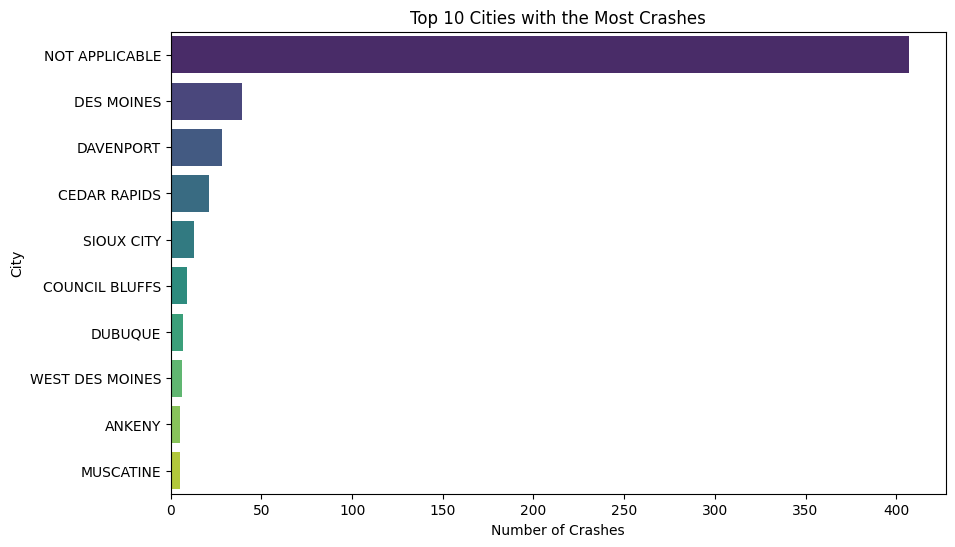

In [ ]:
# Get cities with the most crashes

# Group by the 'CITYNAME' column and count the number of crashes
city_crash_count = fars_data.groupby('CITYNAME').size().reset_index(name='crash_count')

# Sort the cities by crash count in descending order
city_crash_count = city_crash_count.sort_values(by='crash_count', ascending=False)

# Display the top 10 cities with the most crashes
top_cities = city_crash_count.head(10)
print(top_cities)

# Visualize the top 10 cities with the most crashes
plt.figure(figsize=(10, 6))
sns.barplot(x='crash_count', y='CITYNAME', data=top_cities, palette='viridis')
plt.title("Top 10 Cities with the Most Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("City")
plt.show()


#**Get counties with the most crashes**

             COUNTYNAME  crash_count
71           POLK (153)           95
75          SCOTT (163)           38
53           LINN (113)           34
72  POTTAWATTAMIE (155)           24
52            LEE (111)           18
87       WOODBURY (193)           17
48        JOHNSON (103)           14
28         DUBUQUE (61)           13
58         MARION (125)           12
22          DALLAS (49)           12


<ipython-input-14-e0f2039b391a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crash_count', y='COUNTYNAME', data=top_cities, palette='viridis')


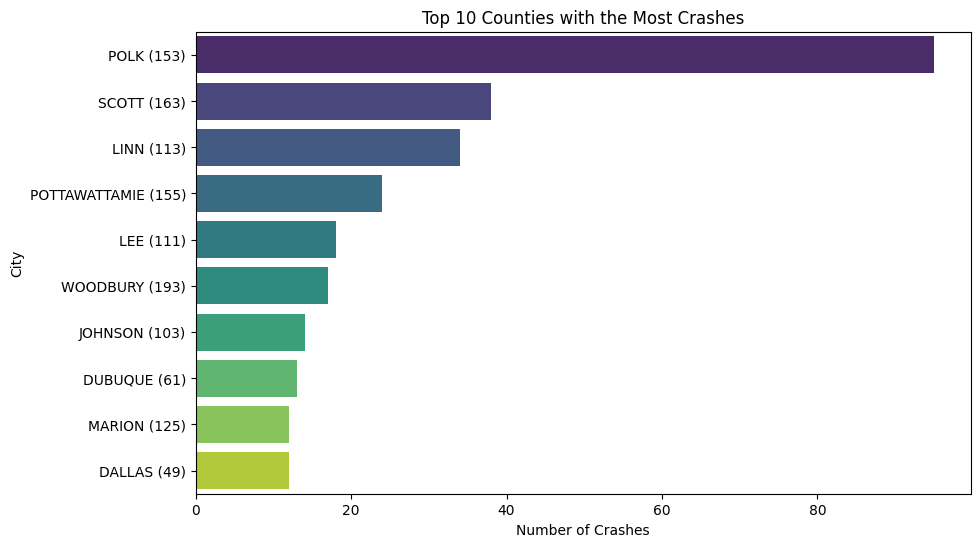

In [ ]:
# Group by the 'COUNTYNAME' column and count the number of crashes
city_crash_count = fars_data.groupby('COUNTYNAME').size().reset_index(name='crash_count')

# Sort the cities by crash count in descending order
city_crash_count = city_crash_count.sort_values(by='crash_count', ascending=False)

# Display the top 10 counties with the most crashes
top_cities = city_crash_count.head(10)
print(top_cities)

# Visualize the top 10 counties with the most crashes
plt.figure(figsize=(10, 6))
sns.barplot(x='crash_count', y='COUNTYNAME', data=top_cities, palette='viridis')
plt.title("Top 10 Counties with the Most Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("City")
plt.show()

#***Determine Crash Count Threshold of Significance***

Mean Crash Count: 7.1
Standard Deviation of Crash Count: 11.245023868260693
Threshold for significant crash count: 18.345023868260693
             COUNTYNAME  crash_count
71           POLK (153)           95
75          SCOTT (163)           38
53           LINN (113)           34
72  POTTAWATTAMIE (155)           24


<ipython-input-15-1de046869128>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crash_count', y='COUNTYNAME', data=significant_counties, palette='viridis')


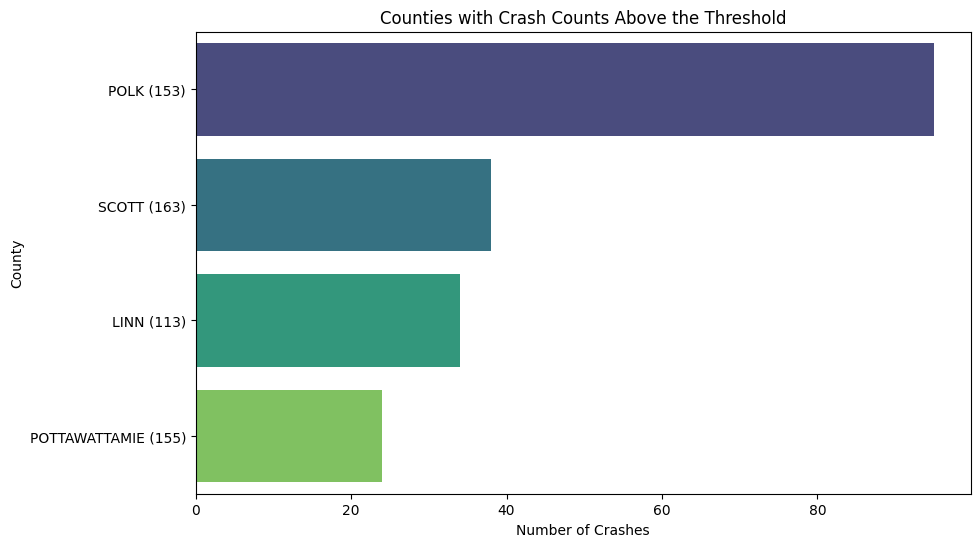

In [ ]:
# Step: Calculate statistical threshold for significance

# Calculate the mean and standard deviation of crash counts
mean_crash_count = city_crash_count['crash_count'].mean()
std_crash_count = city_crash_count['crash_count'].std()

# Define a threshold as: mean + 1 standard deviation
threshold = mean_crash_count + std_crash_count

print(f"Mean Crash Count: {mean_crash_count}")
print(f"Standard Deviation of Crash Count: {std_crash_count}")
print(f"Threshold for significant crash count: {threshold}")

# Identify counties with crash counts above the threshold
significant_counties = city_crash_count[city_crash_count['crash_count'] > threshold]

# Display the significant counties
print(significant_counties)

# Visualize the significant counties
plt.figure(figsize=(10, 6))
sns.barplot(x='crash_count', y='COUNTYNAME', data=significant_counties, palette='viridis')
plt.title("Counties with Crash Counts Above the Threshold")
plt.xlabel("Number of Crashes")
plt.ylabel("County")
plt.show()


#***Analyze Hotspot Characteristics***

#**Feature Importance for Predicting Fatalities in Significant Counties**

Mean Squared Error: 0.1166637931034483
       Feature  Importance
0     HOURNAME    0.337354
2         HARM    0.205784
1          DAY    0.198384
3          LGT    0.131650
4  WEATHERNAME    0.082164
5          TYP    0.044664


<ipython-input-20-66c46aa55522>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=grouped_importance_df, palette='viridis')


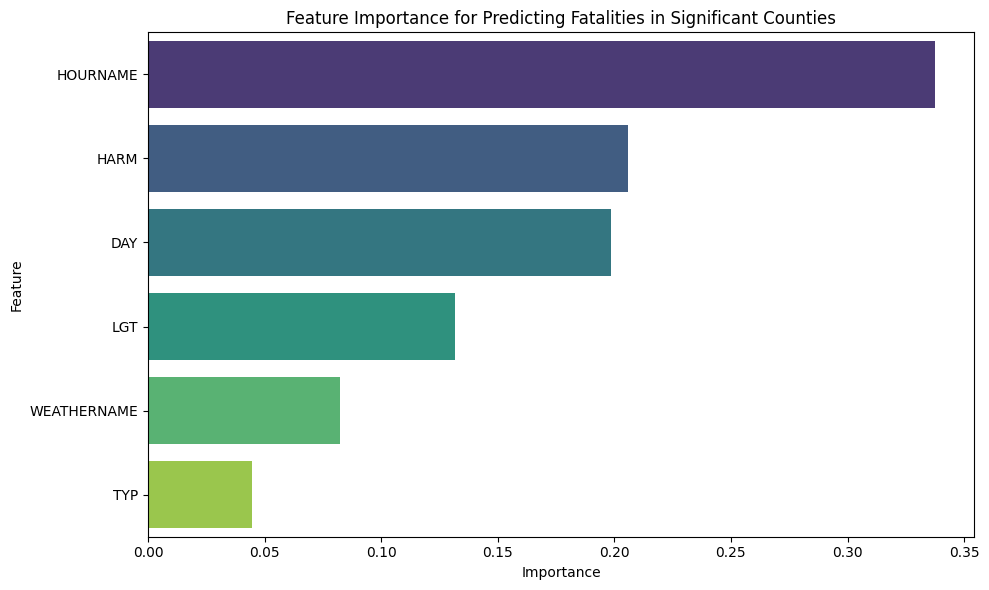

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step: Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Features to include in the model
categorical_features = ['HOURNAME', 'DAY_WEEKNAME', 'HARM_EVNAME', 'LGT_CONDNAME', 'WEATHERNAME', 'TYP_INTNAME']
target = 'FATALS_x'  # Target variable: number of fatalities

# Step 1: Convert categorical variables to numerical format (one-hot encoding)
X = pd.get_dummies(filtered_df[categorical_features], drop_first=True)

# Step 2: Create the target variable
y = filtered_df[target]

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Define and train the model
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 7: Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Step 8: Group feature importances by their original categories
grouped_importances = {}

# Loop through all features and sum importances by their original variable
for feature, importance in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
    # Extract the original feature name by splitting the one-hot encoded feature (before '_')
    original_feature = feature.split('_')[0]

    if original_feature in grouped_importances:
        grouped_importances[original_feature] += importance
    else:
        grouped_importances[original_feature] = importance

# Convert the grouped importances into a DataFrame for better visualization
grouped_importance_df = pd.DataFrame(list(grouped_importances.items()), columns=['Feature', 'Importance'])
grouped_importance_df = grouped_importance_df.sort_values(by='Importance', ascending=False)

# Print the grouped feature importances
print(grouped_importance_df)

# Step 9: Optional - Plot the grouped feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=grouped_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Fatalities in Significant Counties')
plt.tight_layout()
plt.show()


       Feature  Importance
0         HOUR    0.239950
5          DAY    0.228737
6         HARM    0.162887
1         YEAR    0.155767
3          LGT    0.106800
2  WEATHERNAME    0.075181
4          TYP    0.030678


<ipython-input-48-589320eea430>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=grouped_importance_df, palette='viridis')


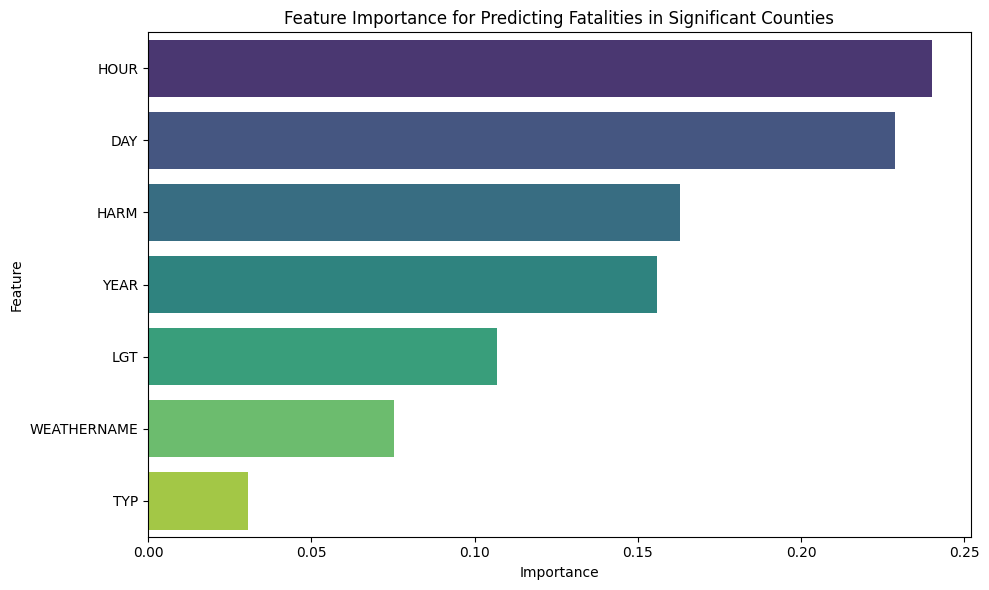

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step: Filter the DataFrame for the significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]


# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Create a dictionary to sum the importances of one-hot encoded features
grouped_importances = {}

# Loop through all features and sum importances by their original variable
for feature, importance in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
    # Extract the original feature name by splitting the one-hot encoded feature (before '_')
    original_feature = feature.split('_')[0]

    if original_feature in grouped_importances:
        grouped_importances[original_feature] += importance
    else:
        grouped_importances[original_feature] = importance

# Convert the grouped importances into a DataFrame for better visualization
grouped_importance_df = pd.DataFrame(list(grouped_importances.items()), columns=['Feature', 'Importance'])
grouped_importance_df = grouped_importance_df.sort_values(by='Importance', ascending=False)

# Print the grouped feature importances
print(grouped_importance_df)

# Optional: Plot the grouped feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=grouped_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Fatalities in Significant Counties')
plt.tight_layout()
plt.show()


#***Crashes by Time-of-Day in Significant Counties***

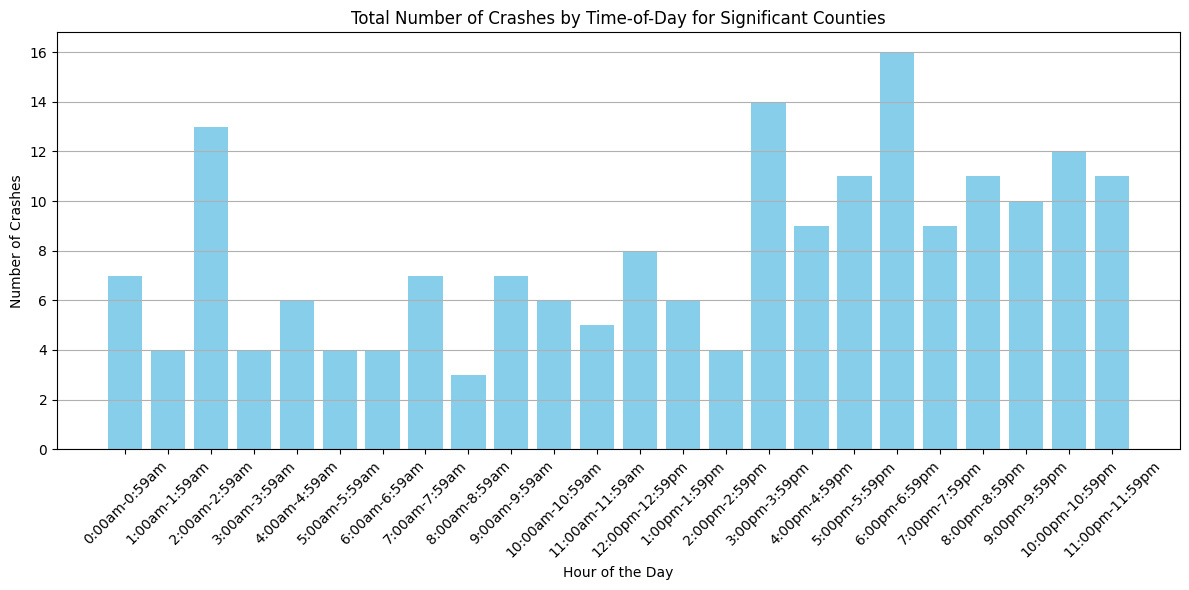

In [ ]:
# Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Group by hour and count the number of crashes (not fatalities)
hourly_counts = filtered_df.groupby(['HOUR', 'HOURNAME']).size().reset_index(name='CRASH_COUNT')

# Sort by the 'HOUR' column to ensure ascending order
hourly_counts = hourly_counts.sort_values(by='HOUR')

# Plot hourly crashes
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts['HOURNAME'], hourly_counts['CRASH_COUNT'], color='skyblue')

# Customize the plot
plt.title('Total Number of Crashes by Time-of-Day for Significant Counties')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate hour names for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

#***Crashes by Day-of-Week in Significant Counties***

<ipython-input-51-1d47c0f820b3>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crash_counts, x='DAY_WEEKNAME', y='FATALITY_COUNT', hue='COUNTYNAME', order=day_order, ci=None)


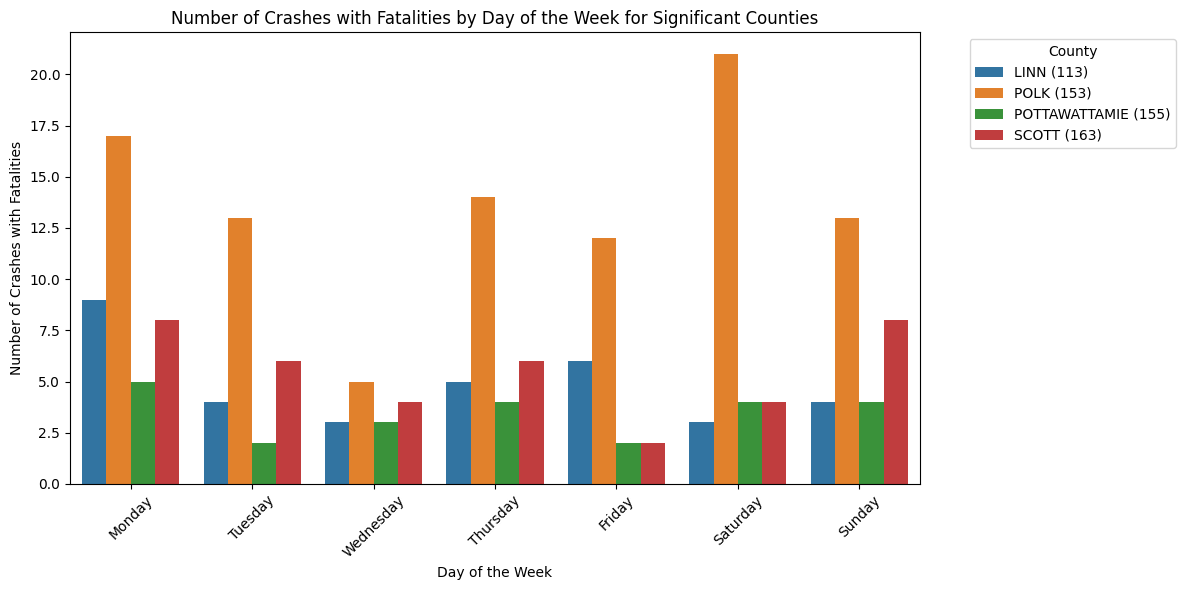

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step: Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Create a count of crashes for each day of the week by county
crash_counts = filtered_df.groupby(['DAY_WEEKNAME', 'COUNTYNAME']).size().reset_index(name='FATALITY_COUNT')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the bar plot with ordered days of the week
sns.barplot(data=crash_counts, x='DAY_WEEKNAME', y='FATALITY_COUNT', hue='COUNTYNAME', order=day_order, ci=None)

# Customize the plot
plt.title('Number of Crashes with Fatalities by Day of the Week for Significant Counties')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes with Fatalities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


#**Top Harmful Events Causing Crashes in Significant Counties**

                   HARM_EVNAME  event_count
13  Motor Vehicle In-Transport           91
17                  Pedestrian           23
6                        Ditch           11
19           Rollover/Overturn            8
5                         Curb            7
23  Utility Pole/Light Support            6
7                   Embankment            6
22        Tree (Standing Only)            4
16                Pedalcyclist            4
4     Concrete Traffic Barrier            3


<ipython-input-52-f15e000cff72>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_count', y='HARM_EVNAME', data=top_harm_events, palette='magma')


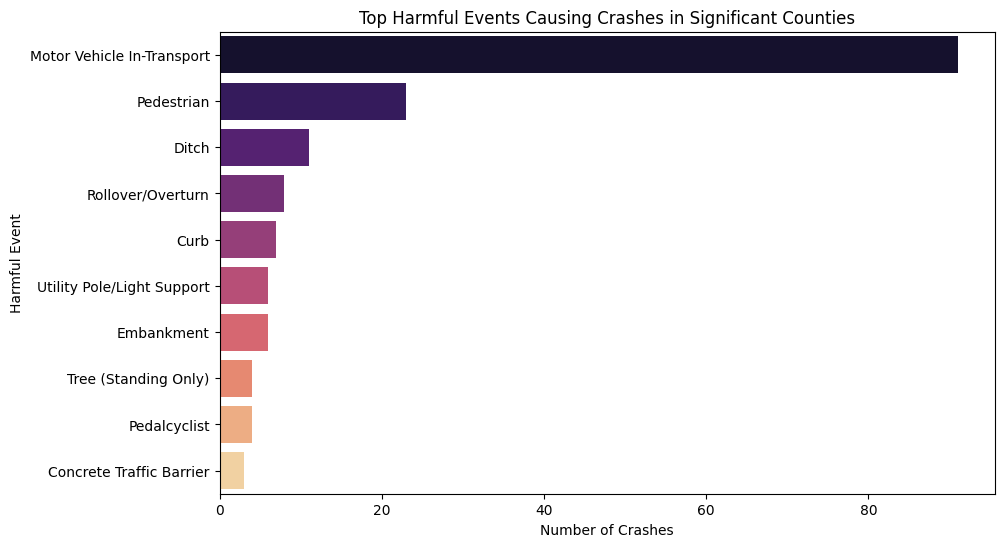

In [ ]:
# Step: Filter the dataset to include only significant counties based on the threshold

# First, we already calculated the significant counties in the previous step
# significant_counties is the DataFrame with counties having crash counts above the threshold

# Now filter the fars_data to include only rows from those significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()

# Filter the fars_data to include only those rows with counties in significant_county_names
significant_crash_data = fars_data[fars_data['COUNTYNAME'].isin(significant_county_names)]

# Step: Analyze the first harmful event (HARM_EVNAME) in those counties
# Group by 'HARM_EVNAME' to count the number of crashes by harmful event
harm_event_analysis = significant_crash_data.groupby('HARM_EVNAME').size().reset_index(name='event_count')

# Sort by the most frequent harmful events
harm_event_analysis = harm_event_analysis.sort_values(by='event_count', ascending=False)

# Display the top 10 harmful events causing crashes
top_harm_events = harm_event_analysis.head(10)
print(top_harm_events)

# Visualize the top 10 harmful events
plt.figure(figsize=(10, 6))
sns.barplot(x='event_count', y='HARM_EVNAME', data=top_harm_events, palette='magma')
plt.title("Top Harmful Events Causing Crashes in Significant Counties")
plt.xlabel("Number of Crashes")
plt.ylabel("Harmful Event")
plt.show()

#**Crashes by Year for Significant Counties**

<ipython-input-53-80adafae2ff7>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=crash_counts, x='YEAR_x', y='FATALITY_COUNT', hue='COUNTYNAME', ci=None)


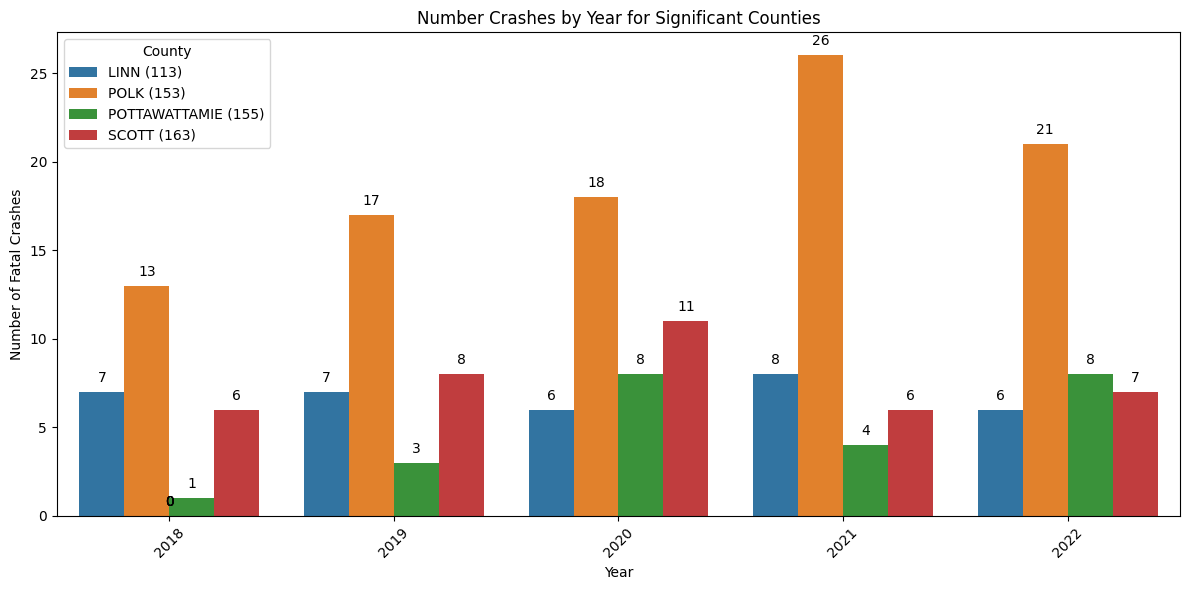

In [ ]:
# Step: Get the names of the significant counties from the previous analysis
significant_county_names = significant_counties['COUNTYNAME'].unique()

# Filter the DataFrame for the significant counties
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Create a count of crashes for each year in the significant counties
crash_counts = filtered_df.groupby(['YEAR_x', 'COUNTYNAME']).size().reset_index(name='FATALITY_COUNT')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create the bar plot for the significant counties
bar_plot = sns.barplot(data=crash_counts, x='YEAR_x', y='FATALITY_COUNT', hue='COUNTYNAME', ci=None)

# Annotate each bar with the corresponding frequency value
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),  # Format as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the annotation
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Customize the plot
plt.title('Number Crashes by Year for Significant Counties')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Crashes')
plt.xticks(rotation=45)
plt.legend(title='County')
plt.tight_layout()

# Show the plot
plt.show()


#**Most highly correlating feature with crash frequency over the years**

In [ ]:
import pandas as pd
import numpy as np

# Step: Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Drop non-relevant columns and keep only the features and the target variable
features = filtered_df.drop(columns=['FATALS_x', 'YEAR_x', 'COUNTYNAME'])  # Exclude target and county
target = filtered_df['FATALS_x']

# Step 1: Convert categorical variables to numerical format using one-hot encoding
features_encoded = pd.get_dummies(features, drop_first=True)

# Step 2: Concatenate the encoded features and target variable into a new DataFrame
data_with_target = pd.concat([features_encoded, target], axis=1)

# Step 3: Calculate the correlation matrix
correlation_matrix = data_with_target.corr()

# Step 4: Extract the correlation of all features with 'FATALS_x' (target variable)
correlation_with_target = correlation_matrix['FATALS_x'].drop('FATALS_x')  # Exclude correlation of target with itself

# Step 5: Sort the correlation values by absolute correlation and get the top 10
top_10_correlating_features = correlation_with_target.abs().sort_values(ascending=False).head(10)

print("Top 10 most highly correlating features with FATALS_x:")
print(top_10_correlating_features)



Top 10 most highly correlating features with FATALS_x:
FATALS_y                     1.000000
LATITUDENAME_41.60547222     0.404594
LONGITUDNAME_-90.64874444    0.404594
LATITUDENAME_41.57410833     0.404594
TWAY_ID_NW 86TH ST           0.404594
LATITUDENAME_41.66186667     0.404594
MILEPTNAME_185               0.404594
MILEPTNAME_147               0.404594
TWAY_ID2_WISCONSIN AVE       0.404594
LONGITUDNAME_-93.73625       0.404594
Name: FATALS_x, dtype: float64


#***Crashes by Light Conditions in Significant Counties***

<ipython-input-55-e5423aa38dc5>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=light_condition_counts, x='LGT_CONDNAME', y='CRASH_COUNT', hue='COUNTYNAME', ci=None)


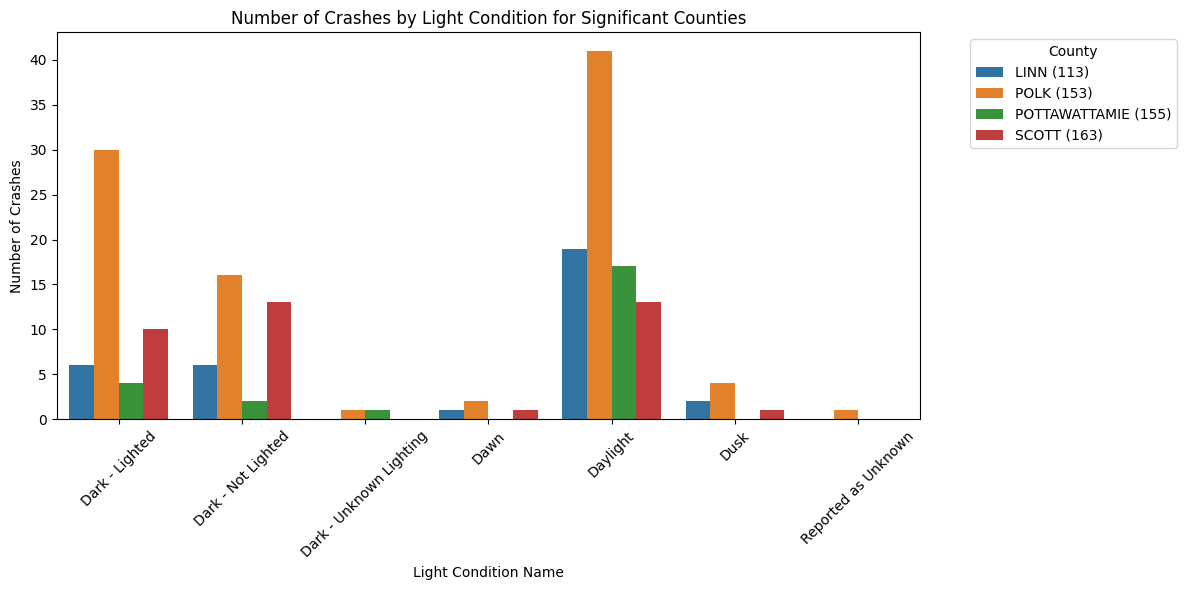

In [ ]:
#Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Create a count of crashes for each light condition by county
light_condition_counts = filtered_df.groupby(['LGT_CONDNAME', 'COUNTYNAME']).size().reset_index(name='CRASH_COUNT')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=light_condition_counts, x='LGT_CONDNAME', y='CRASH_COUNT', hue='COUNTYNAME', ci=None)

# Customize the plot
plt.title('Number of Crashes by Light Condition for Significant Counties')
plt.xlabel('Light Condition Name')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


#***Crashes by Weather Conditions in Significant Counties***

<ipython-input-54-44e7ec31ec4f>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=weather_condition_counts, x='WEATHERNAME', y='CRASH_COUNT', hue='COUNTYNAME', ci=None)


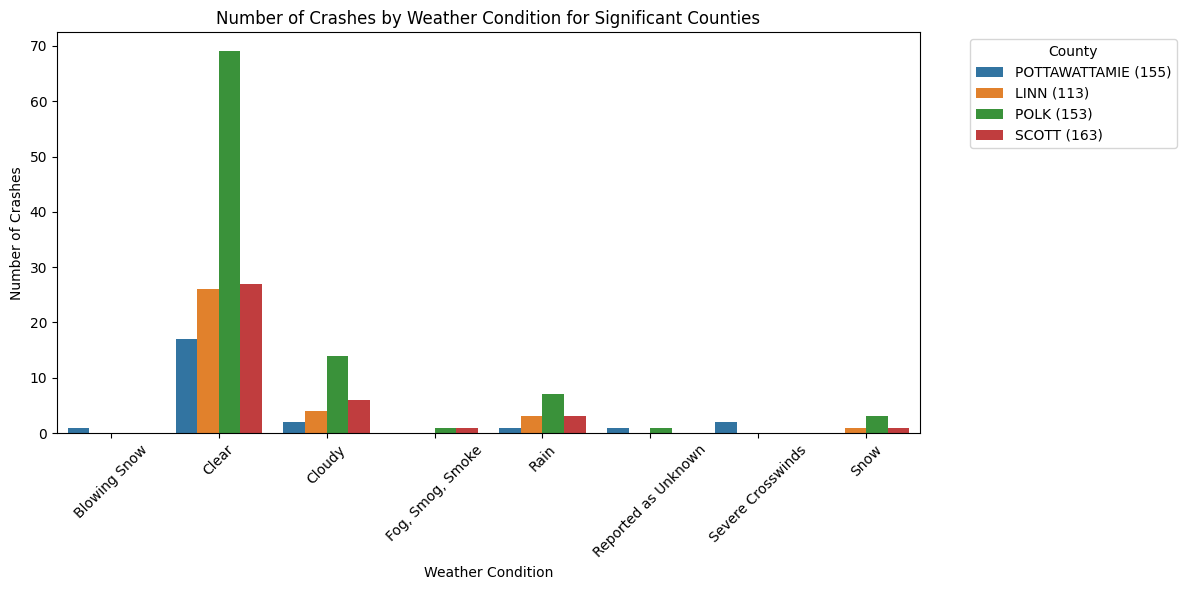

In [ ]:
# Step: Filter the DataFrame for the significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Create a count of crashes for each weather condition by county
weather_condition_counts = filtered_df.groupby(['WEATHERNAME', 'COUNTYNAME']).size().reset_index(name='CRASH_COUNT')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=weather_condition_counts, x='WEATHERNAME', y='CRASH_COUNT', hue='COUNTYNAME', ci=None)

# Customize the plot
plt.title('Number of Crashes by Weather Condition for Significant Counties')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


#**Crashes by Intersection Type for Significant Counties**

<ipython-input-45-eb201c3420dc>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=intersection_counts, x='TYP_INTNAME', y='CRASH_COUNT', hue='COUNTYNAME', ci=None)


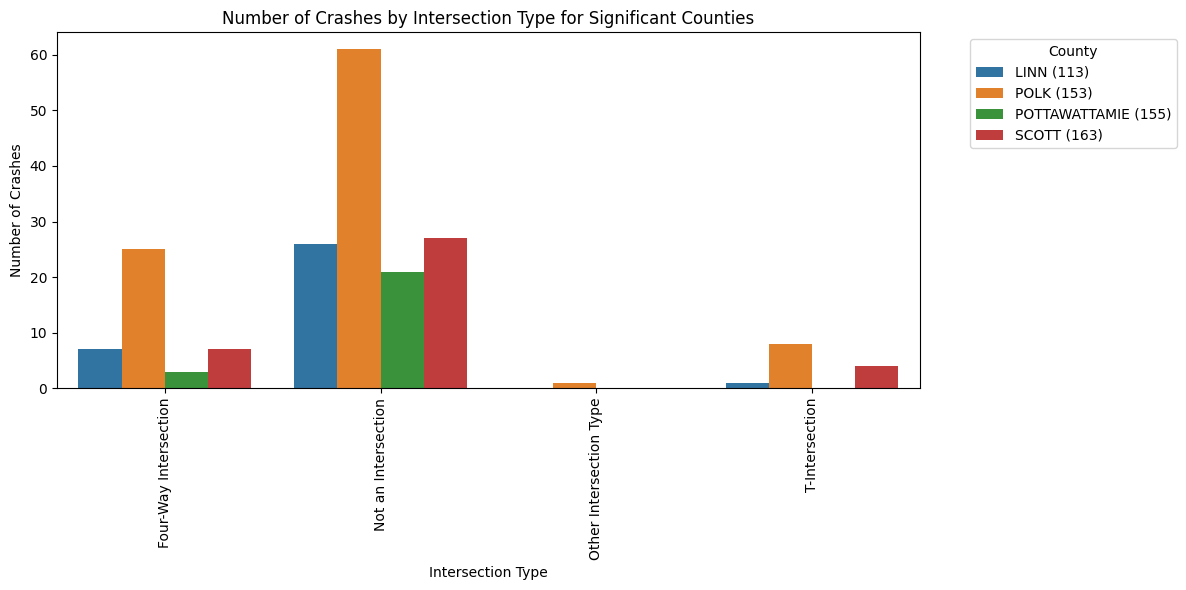

In [ ]:
# Filter the DataFrame for the significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Create a count of crashes for each intersection type by county
intersection_counts = filtered_df.groupby(['TYP_INTNAME', 'COUNTYNAME']).size().reset_index(name='CRASH_COUNT')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=intersection_counts, x='TYP_INTNAME', y='CRASH_COUNT', hue='COUNTYNAME', ci=None)

# Customize the plot
plt.title('Number of Crashes by Intersection Type for Significant Counties')
plt.xlabel('Intersection Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


#***Prediction of the number of fatalities for crashes in hotspot areas***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step: Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Features to include in the model
categorical_features = ['HOURNAME', 'DAY_WEEKNAME', 'HARM_EVNAME', 'LGT_CONDNAME', 'WEATHERNAME', 'TYP_INTNAME']
target = 'FATALS_x'  # Target variable: number of fatalities

# Step 1: Convert categorical variables to numerical format (one-hot encoding)
X = pd.get_dummies(filtered_df[categorical_features], drop_first=True)

# Step 2: Create the target variable
y = filtered_df[target]

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optional: Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the top features driving the predictions
print(feature_importance_df.head(10))


Mean Squared Error: 0.1166637931034483
                                   Feature  Importance
7                   HOURNAME_2:00am-2:59am    0.143880
51  HARM_EVNAME_Utility Pole/Light Support    0.111873
56                   LGT_CONDNAME_Daylight    0.081263
41  HARM_EVNAME_Motor Vehicle In-Transport    0.061586
20                  HOURNAME_8:00pm-8:59pm    0.050688
53         LGT_CONDNAME_Dark - Not Lighted    0.049493
59                       WEATHERNAME_Clear    0.049096
24                   DAY_WEEKNAME_Saturday    0.047324
66         TYP_INTNAME_Not an Intersection    0.043695
23                     DAY_WEEKNAME_Monday    0.039803


#**Static Visualization of Fatal Crash Patterns in Significant Counties**

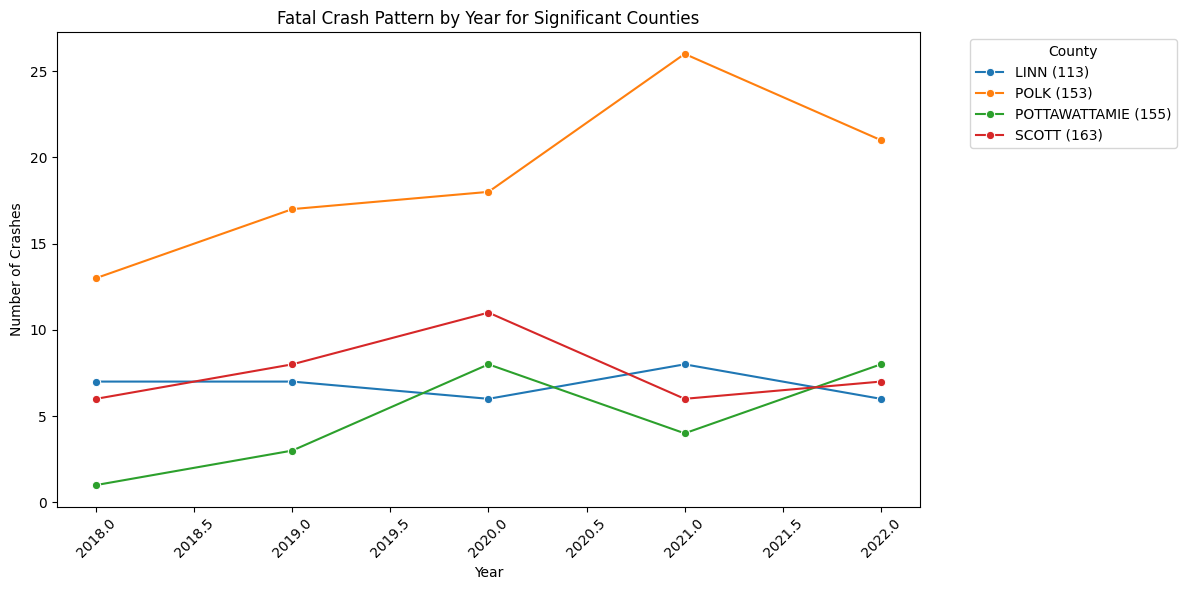

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step: Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()
filtered_df = final_df[final_df['COUNTYNAME'].isin(significant_county_names)]

# Step 1: Create static visualizations (e.g., number of crashes by year and county)
def create_static_visualization():
    # Group data by year and county to get the crash counts
    crash_counts = filtered_df.groupby(['YEAR_x', 'COUNTYNAME']).size().reset_index(name='CRASH_COUNT')

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 6))

    # Create the line plot for crash patterns by year for significant counties
    sns.lineplot(data=crash_counts, x='YEAR_x', y='CRASH_COUNT', hue='COUNTYNAME', marker='o')

    # Customize the plot
    plt.title('Fatal Crash Pattern by Year for Significant Counties')
    plt.xlabel('Year')
    plt.ylabel('Number of Crashes')
    plt.xticks(rotation=45)
    plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function to create the line graph
create_static_visualization()


#**Time-lapse Animation of Fatal Crash Patterns in Significant Counties**

In [ ]:
import plotly.express as px
import pandas as pd

#Filter the DataFrame for significant counties
significant_county_names = significant_counties['COUNTYNAME'].unique()

# Filter the data for significant counties and a specific time range (e.g., 2018-2022)
filtered_df = final_df[
    (final_df['COUNTYNAME'].isin(significant_county_names)) &
    (final_df['YEAR_x'].between(2018, 2022))
].copy()

filtered_df = filtered_df.sort_values(by='YEAR_x')

# Create an animated scatter plot using Plotly
fig = px.scatter(
    filtered_df, x='LONGITUD', y='LATITUDE', animation_frame='YEAR_x',
    size='FATALS_x', color='COUNTYNAME', hover_name='COUNTYNAME',
    range_x=[filtered_df['LONGITUD'].min()-1, filtered_df['LONGITUD'].max()+1],
    range_y=[filtered_df['LATITUDE'].min()-1, filtered_df['LATITUDE'].max()+1],
    title='Time-Lapse of Fatal Crashes in Significant Counties (2018-2022)',
    size_max=10  # Set max size for fatality bubbles to avoid oversized markers
)

# Customize the layout
fig.update_layout(
    title_text='Fatal Crash Patterns in Significant Counties (2018-2022)',
    xaxis_title='Longitude',
    yaxis_title='Latitude'
)

# Display the animation
fig.show()


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

#***Data-driven recommendations for improving pedestrian safety on these roads***

Crash Hotspots and High-Risk Areas:

Recommendation: Implement targeted infrastructure improvements, such as pedestrian bridges, improved crosswalk visibility, and dedicated pedestrian signals in high-risk areas.

Time-of-Day and Lighting Conditions:

Recommendation: Install better street lighting or pedestrian-activated flashing lights in poorly lit areas, particularly at crosswalks and intersections.

Weather Conditions:

Recommendation: Install weather-adaptive traffic signals or warning systems to alert both drivers and pedestrians during adverse weather conditions. Improved drainage systems to avoid water pooling can also help prevent accidents during rain.

Intersection Types:

Recommendation: Redesign problematic intersections to include pedestrian refuge islands, reduce crossing distances, and install leading pedestrian intervals (LPIs) at traffic signals.

Harmful Events:

Recommendation: Implement measures to prevent or mitigate these harmful events, such as speed limit reductions, traffic calming measures (e.g., speed bumps, curb extensions), or installing protected bike and pedestrian lanes.

Day of the Week and Hourly Patterns:

Recommendation: Increase enforcement and safety measures during peak times, such as enhanced police presence, temporary traffic calming devices, or pedestrian zones during high-risk hours.

Pedestrian Behavior and Awareness:

Recommendation: Launch educational campaigns targeting both pedestrians and drivers, emphasizing pedestrian safety, proper road usage, and the dangers of distracted walking and driving. Encourage community engagement and the use of apps to report unsafe conditions.


Technology-Driven Solutions:

Recommendation: Deploy advanced technologies such as automated pedestrian detection systems at intersections, which can trigger longer crossing times for pedestrians. Install sensors or cameras that can detect and alert drivers of pedestrian activity at crossings.